# Cleaning and Wrangling Data

**Learning objective:** Learn how to clean up data before it is used for analysis and visualization.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns

## Introduction

Data and cleaning and wrangling is a critically important part of data science. Hadley Wickham coined the phrase "tidy data" and has written a paper entitled [Tidy Data](http://vita.had.co.nz/papers/tidy-data.pdf) clarifying its meaning. In general, making your data tidy is the first thing you want to do after acquiring data. 

Tidy Data has the following characteristics: 

* Each column should contain a single variable.
* Each row should contain a single measurement or sample.
* Each table should contain data about a single entity.
* Relationships between entities should be expressed through multiple tables and key columns.
* Each column should have a well defined and clear name.
* The rows should have an appropriate index.
* The `dtype` of each column should be appropriate for that variable.
* Missing values and NaNs should be handled appropriately and consistently.
* Duplicates values or rows should be removed or handled appropriately.
* Categorical values should be normalized so that each logical category is represented by a single well defined value.
* Strings should to wrangled into a consistent format (case, spaces, etc.).

This notebook closely follows Chapter 7 of Wes McKinney's [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do).

## Removing duplicates

Entire DataFrames or particular Series may have duplicated rows that need to be removed.

In [2]:
df = DataFrame(np.random.choice((0,1,2),10), index=list('abcdefghij'))

In [3]:
df

,0
a,2
b,2
c,1
d,0
e,1
f,1
g,2
h,1
i,2
j,0


The `duplicated` method returns a boolean valued Series indicating which values are duplicated:

In [4]:
df.duplicated()

a    False
b     True
c    False
d    False
e     True
f     True
g     True
h     True
i     True
j     True
dtype: bool

The `drop_duplicates` drops the duplicate rows:

In [5]:
df.drop_duplicates()

,0
a,2
c,1
d,0


## Transforming data Using a function or mapping

One of the most powerful and general ways of transforming data is to provide a function or mapping (dict) that transformed existing values to new ones.

Here is an example of a DataFrame with letter grades that are strings:

In [6]:
df = DataFrame({'grade':np.random.choice(['A','B','C','D','F'],20)})

In [7]:
df.head()

,grade
0,F
1,D
2,B
3,D
4,F


Here is a simple mapping/dict that will transform the letter grades to GPAs that are strings:

In [8]:
grade2gpa = {'A':'4.0', 'B':'3.0', 'C':'2.0', 'D':'1.0', 'F':'0.0'}

Passing that mapping/dict to the `.map()` method will make the substitutions:

In [9]:
df['grade'].map(grade2gpa).head()

0    0.0
1    1.0
2    3.0
3    1.0
4    0.0
Name: grade, dtype: object

The values are still strings, but we can use the `float` function to convert them to actual numbers:

In [10]:
float('3.0')

3.0

In [11]:
df['gpa'] = df['grade'].map(grade2gpa).map(float)

In [12]:
df.head()

,grade,gpa
0,F,0
1,D,1
2,B,3
3,D,1
4,F,0


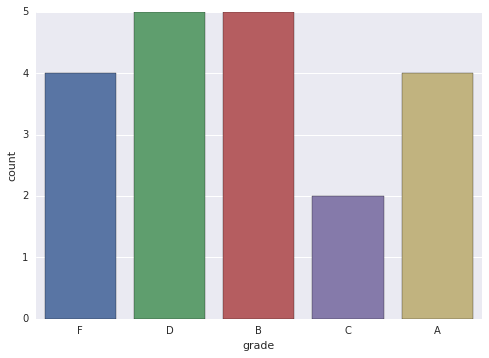

In [15]:
sns.countplot(x=df.grade)

In [209]:
counts = df.grade.value_counts().sort_index()

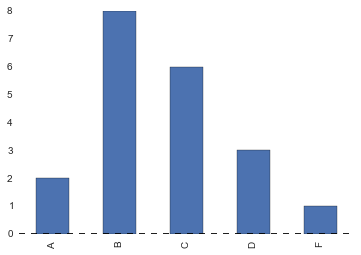

In [210]:
counts.plot(kind='bar')

## Replacing values

Often times categorical variables will have different representations of a single category. Replacement is needed to convert all representations to the same value.

Here is a Series having different representations for "male" and "female":

In [16]:
s = Series(np.random.choice(['man','woman','F','M','Male','Female'],20))
s

0          M
1          F
2     Female
3       Male
4          M
5      woman
6          F
7     Female
8      woman
9     Female
10      Male
11     woman
12         F
13     woman
14         F
15    Female
16     woman
17         F
18         F
19       man
dtype: object

In [17]:
s = s.str.lower()

This version of `replace` replaces all occurences of `f` by `female`:

In [18]:
s.replace('f','female')

0          m
1     female
2     female
3       male
4          m
5      woman
6     female
7     female
8      woman
9     female
10      male
11     woman
12    female
13     woman
14    female
15    female
16     woman
17    female
18    female
19       man
dtype: object

There are two other way of providing the arguments to `replace`:

In [19]:
s = s.replace(['f','woman'],'female')  # f->female and woman->female
s = s.replace({'man':'male', 'm':'male'})  # man->male and m->male

In [20]:
s.unique()

array(['male', 'female'], dtype=object)

## Renaming indices

To rename to column labels or index:

* Set the `.index` or `.columns` attributes.
* Use `DataFrame.rename()` to transform the column or index names. Use `inplace=True` to avoid copying.
* Use `DataFrame.index.map()` or `DataFrame.columns.map()` to transform the column or index names.

## Discretization and binning

Sometimes data has been gathered in the form of numerical or interval data, but it is desires to bin or discretize the data into ranges.

Here is some age data:

In [218]:
df = DataFrame({'age':np.random.randint(0,65,40)})

In [219]:
df.head()

,age
0,33
1,41
2,51
3,35
4,41


We define a list of integers that will be used for the discretization boundaries:

In [78]:
bins = [0,20,40,60,65]

The `cut` function takes the `Series` to discretize and the bin to use and returns a `Series` with the `dtype` of `category`:

In [220]:
df.labels = pd.cut(df.age, bins)

In [221]:
df.labels.head()

0    (20, 40]
1    (40, 60]
2    (40, 60]
3    (20, 40]
4    (40, 60]
Name: age, dtype: category
Categories (4, object): [(0, 20] < (20, 40] < (40, 60] < (60, 65]]

In [222]:
df.labels.value_counts()

(40, 60]    15
(20, 40]    13
(0, 20]      6
(60, 65]     5
dtype: int64

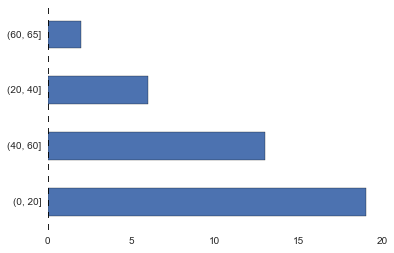

In [223]:
labels.value_counts().plot(kind='barh')

See the `qcut` function for binning into quantiles.

## Permutation and random sampling

Sometimes you want to permute the rows of your data or perform random sampling to extract a random subset of rows. This can be done by using `np.random.permutation`, which is essentially a scrambled version of Python's `range` function:

In [224]:
np.random.permutation(10)

array([7, 8, 1, 9, 6, 4, 2, 0, 3, 5])

In [225]:
df = DataFrame({'income':np.random.randint(50,150,10),
                'company':list('abcdefghij')}, columns=['company','income']) 

In [226]:
df

,company,income
0,a,79
1,b,106
2,c,110
3,d,91
4,e,61
5,f,72
6,g,91
7,h,139
8,i,105
9,j,53


If we want to permute the entire DataFrame, pass a permutation array of the same length as the DataFrame:

In [227]:
df.take(np.random.permutation(10))

,company,income
6,g,91
2,c,110
3,d,91
1,b,106
4,e,61
9,j,53
8,i,105
5,f,72
0,a,79
7,h,139


To randomly sample a subset of the rows, pass a slice of the permutation array:

In [228]:
df.take(np.random.permutation(10)[:5])

,company,income
8,i,105
2,c,110
9,j,53
6,g,91
5,f,72


What is wrong with trying to do random sampling using `df.take(np.random.permutation(5))`?

## Computing indicator/dummy variables

The `get_dummies` function transforms 1 column of categorical data with `N` unique values into `N` boolean valued columns. This is useful for statistical modeling and machine learning applications.

Here is a simple DataFrame with one categorical column with 3 unique values:

In [229]:
df = DataFrame({'mobile':np.random.choice(['ios','android','windows'],20)})

In [230]:
df

,mobile
0,ios
1,ios
2,windows
3,ios
4,windows
5,ios
6,windows
7,ios
8,android
9,windows


In this case `get_dummies` converts that column into 3 separate boolean columns, one for each mobile OS:

In [231]:
pd.get_dummies(df.mobile)

,android,ios,windows
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1
5,0,1,0
6,0,0,1
7,0,1,0
8,1,0,0
9,0,0,1


## String object methods

Python strings have a number of methods that are useful for performing transformations. 

In [155]:
emails = 'BartSimpson@gmail.com, LisaSimpson@stanford.edu, MILHOUSE@yahoo.com'

Split the string into a list of strings given a separator:

In [128]:
parts = emails.split(',')

Let's remove or `strip` the leading and trailing whitespace off each component:

In [129]:
addresses = [s.strip() for s in parts]

We can further split the email address using `@` as the separator:

In [140]:
bart, gmail = addresses[0].split('@')
bart, gmail

('BartSimpson', 'gmail.com')

Convert to lowercase:

In [141]:
bart.lower()

'bartsimpson'

Or uppercase:

In [142]:
bart.upper()

'BARTSIMPSON'

Count the number of times a character appears:

In [143]:
bart.count('s')

1

Or find the location in the string that a character or substring appears:

In [145]:
gmail.index('.')

5

You can also see if a string starts or ends with a particular substring:

In [146]:
gmail.startswith('yahoo')

False

In [147]:
gmail.endswith('.com')

True

The `replace` method works as expected:

In [148]:
yahoo = gmail.replace('gmail','yahoo')

In [149]:
yahoo

'yahoo.com'

## Vectorized string methods

Often you want to perform this type of string transformation on each element of `Series`. You can always use the `.map()` method of the `Series` to do this, but there is a `.str` attribute on the `Series` object that automatically provides vectorized versions of the string transformation methods.

Let's turn our email list above into a simple `DataFrame`:

In [170]:
data = DataFrame({'email':emails.split(',')})

In [171]:
data

,email
0,BartSimpson@gmail.com
1,LisaSimpson@stanford.edu
2,MILHOUSE@yahoo.com


We can transformt the entire `email` `Series` using the syntax `data.email.str.<method>`. For example, this makes each element lowercase and removes leading and trailing whitespace:

In [173]:
data.email = data.email.str.lower().str.strip()

In [174]:
data

,email
0,bartsimpson@gmail.com
1,lisasimpson@stanford.edu
2,milhouse@yahoo.com


Now let's split on the `@` character to extract the username and domain into their own columns:

In [180]:
data['username'] = data.email.str.split('@').map(lambda x: x[0])

In [181]:
data['domain'] = data.email.str.split('@').map(lambda x: x[1])

In [182]:
data

,email,username,domain
0,bartsimpson@gmail.com,bartsimpson,gmail.com
1,lisasimpson@stanford.edu,lisasimpson,stanford.edu
2,milhouse@yahoo.com,milhouse,yahoo.com
